In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [12]:
class electron:
    def __init__(self):
        self.x = []
        self.y = []
        self.v =[]

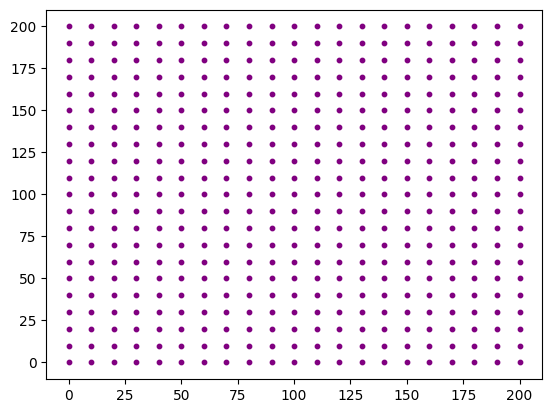

In [13]:
grid_size = 200 # Defining matrix of cations
vel = np.array([np.random.randint(1.0), np.random.randint(1.0)]) # velocity of electron
acc = np.array([0, np.random.randint(5.0)]) # acceleration of electron

x, y = np.meshgrid(np.arange(0, grid_size+1, 10), np.arange(0, grid_size+1, 10))
plt.scatter(x, y, color='purple', s=10)

In [14]:
def get_x0_and_v0_bruh():
    x0 = np.random.randint(grid_size)
    while x0%10==0:
        x0 = np.random.randint(grid_size)
    v0 = np.array([np.random.uniform(0, 1), np.random.uniform(0, 1)])
    return [x0, v0]

In [15]:
positions = np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)
#print(electron())

def get_distances(pos):
    distances = []
    xdiffs = []
    ydiffs = []
    for i in positions: 
        x_diff = pos[0] - i[0]
        y_diff = pos[1] - i[1]
        xdiffs.append(x_diff)
        ydiffs.append(y_diff)
        distances.append(np.sqrt(x_diff**2 + y_diff**2))
    return [distances, xdiffs, ydiffs]

In [23]:
#current_pos = np.array([ini_x,0])

#poss = [current_pos]




720


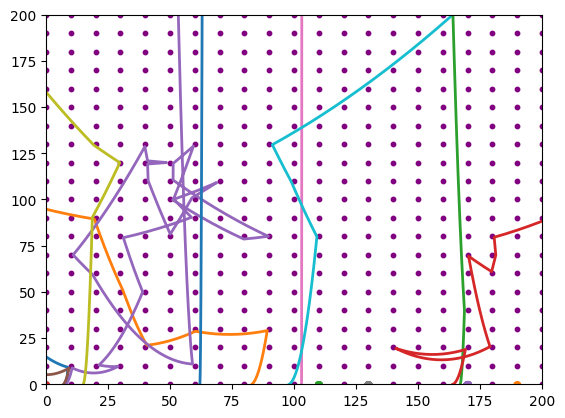

In [28]:
r = 1.5

electrons = [electron() for i in range(15)]

for i in electrons:
    i.x.append(get_x0_and_v0_bruh()[0])
    i.y.append(0)
    i.v.append(get_x0_and_v0_bruh()[1])

for i in electrons: 
    while (i.x[-1] <= grid_size and i.x[-1] >= 0) and (i.y[-1] <= grid_size and i.y[-1] >= 0):
        d = get_distances([i.x[-1], i.y[-1]])
        if min(d[0]) < r:  
            index = [i for i in range(len(d[0])) if d[0][i] < r][0]
            x_diff = d[1][index]
            y_diff = d[2][index]
            diff = np.array([x_diff, y_diff])
            i.v.append(i.v[-1] - 2 * ((np.dot(i.v[-1], diff))/(x_diff**2+y_diff**2)) * diff)
        else:
            i.v.append(i.v[-1] + acc * 0.1)
        i.x.append(i.x[-1] + i.v[-1][0]*0.1)
        i.y.append(i.y[-1] + i.v[-1][1]*0.1)
        #poss.append(current_pos)
#poss = np.array(poss)



fig, ax = plt.subplots()
plt.xlim([0, grid_size])
plt.ylim([0, grid_size])

lines = []
X_data = []
Y_data = []

for i in electrons:
    line, = ax.plot([], [], lw=2)
    lines.append(line)
    X_data.append(i.x)
    Y_data.append(i.y)

def update(num, X_data, Y_data, lines):
    for i, line in enumerate(lines):
        line.set_data(X_data[i][:num], Y_data[i][:num])
    return lines

length = 0

for i in electrons:
    if len(i.x) > length:
        length = len(i.x)

print(length)

plt.scatter(x, y, color='purple', s=10)
ani = animation.FuncAnimation(fig, update, frames=length, 
                              fargs=(X_data, Y_data, lines), interval=100, blit=True)

writervideo = animation.FFMpegWriter(fps=120)
ani.save("animation.mp4", writer=writervideo)

plt.show()